In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
df1_og = pd.read_csv('election.csv')
df2_og = pd.read_excel('education.xls', skiprows=range(4))
df3_og = pd.read_excel('population.xls', skiprows=[0, 1])
df4_og = pd.read_excel('unemployment.xls', skiprows=range(7))

# EDA

In [3]:
df1_og.columns

Index(['state', 'county', 'fips', 'trump16', 'clinton16', 'otherpres16',
       'romney12', 'obama12', 'otherpres12', 'demsen16', 'repsen16',
       'othersen16', 'demhouse16', 'rephouse16', 'otherhouse16', 'demgov16',
       'repgov16', 'othergov16', 'repgov14', 'demgov14', 'othergov14',
       'total_population', 'cvap', 'white_pct', 'black_pct', 'hispanic_pct',
       'nonwhite_pct', 'foreignborn_pct', 'female_pct', 'age29andunder_pct',
       'age65andolder_pct', 'median_hh_inc', 'clf_unemploy_pct', 'lesshs_pct',
       'lesscollege_pct', 'lesshs_whites_pct', 'lesscollege_whites_pct',
       'rural_pct', 'ruralurban_cc'],
      dtype='object')

In [4]:
def drop_cols(dataframe, cols):
    for col in cols:
        dataframe = dataframe.drop(col, axis=1)
    return dataframe

to_drop = ['state', 'county', 'otherpres16', 'otherpres12', 'othersen16', 'otherhouse16', 
           'othergov16', 'repgov14', 'demgov14', 'othergov14', 'nonwhite_pct', 
           'ruralurban_cc', 'repgov16', 'demgov16', 'repsen16', 'demsen16']

In [5]:
df1 = drop_cols(df1_og, to_drop)

In [6]:
df1.head()

,fips,trump16,clinton16,romney12,obama12,demhouse16,rephouse16,total_population,cvap,white_pct,...,female_pct,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct
0,1001,18172,5936,17379,6363,7544.0,14315.0,55049.0,40690.0,75.683482,...,51.176225,40.037058,13.978456,53099.0,5.591657,12.417046,75.407229,10.002112,74.065601,42.002162
1,1003,72883,18458,66016,18424,0.0,76995.0,199510.0,151770.0,83.178788,...,51.194928,35.474412,18.714851,51365.0,6.286843,9.972418,70.452889,7.842227,68.405607,42.279099
2,1005,5454,4871,5550,5912,5297.0,4286.0,26614.0,20375.0,45.885624,...,46.498084,37.664387,16.528895,33956.0,12.824738,26.235928,87.132213,19.579752,81.364746,67.789635
3,1007,6738,1874,6132,2202,1971.0,6670.0,22572.0,17590.0,74.765196,...,46.464646,37.329435,14.885699,39776.0,7.146827,19.301587,88.000000,15.020490,87.471774,68.352607
4,1009,22859,2156,20757,2970,2390.0,22367.0,57704.0,42430.0,87.657701,...,50.485235,37.240053,17.192916,46212.0,5.953833,19.968585,86.950243,16.643368,86.163610,89.951502


In [7]:
df1['rd_ratio_pres_16'] = df1.pop('trump16') / df1.pop('clinton16')
df1['rd_ratio_pres_12'] = df1.pop('romney12') / df1.pop('obama12')
df1['rd_ratio_house_16'] = df1.pop('rephouse16') / df1.pop('demhouse16')

In [8]:
df1.columns

Index(['fips', 'total_population', 'cvap', 'white_pct', 'black_pct',
       'hispanic_pct', 'foreignborn_pct', 'female_pct', 'age29andunder_pct',
       'age65andolder_pct', 'median_hh_inc', 'clf_unemploy_pct', 'lesshs_pct',
       'lesscollege_pct', 'lesshs_whites_pct', 'lesscollege_whites_pct',
       'rural_pct', 'rd_ratio_pres_16', 'rd_ratio_pres_12',
       'rd_ratio_house_16'],
      dtype='object')

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 20 columns):
fips                      3114 non-null int64
total_population          3111 non-null float64
cvap                      3111 non-null float64
white_pct                 3111 non-null float64
black_pct                 3111 non-null float64
hispanic_pct              3111 non-null float64
foreignborn_pct           3111 non-null float64
female_pct                3111 non-null float64
age29andunder_pct         3111 non-null float64
age65andolder_pct         3111 non-null float64
median_hh_inc             3111 non-null float64
clf_unemploy_pct          3111 non-null float64
lesshs_pct                3111 non-null float64
lesscollege_pct           3111 non-null float64
lesshs_whites_pct         3111 non-null float64
lesscollege_whites_pct    3111 non-null float64
rural_pct                 3113 non-null float64
rd_ratio_pres_16          3113 non-null float64
rd_ratio_pres_12          3114 

In [10]:
df1_sample_incomplete_rows = df1[df1.isnull().any(axis=1)].head()
df1_sample_incomplete_rows

,fips,total_population,cvap,white_pct,black_pct,hispanic_pct,foreignborn_pct,female_pct,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,rd_ratio_pres_16,rd_ratio_pres_12,rd_ratio_house_16
290,11001,659009.0,494090.0,35.769162,47.428336,10.486351,14.038200,52.560739,41.598218,11.405914,72935.0,8.734350,10.045421,44.639814,0.617842,9.188199,0.000000,0.044985,0.080058,NaN
777,19037,12164.0,9160.0,96.390990,0.583690,2.211444,1.471555,49.654719,35.785926,19.130220,48013.0,3.158560,9.717568,85.519387,9.407580,85.367349,73.534850,1.651368,0.797974,NaN
779,19041,16478.0,12555.0,94.192256,0.285229,3.198204,1.705304,50.886030,35.829591,19.347008,48888.0,3.255655,6.772284,79.134749,5.358593,78.610735,34.289314,2.613161,1.462629,NaN
782,19047,17147.0,11175.0,68.186855,1.417158,27.275908,13.331778,49.145623,40.823468,16.551000,49699.0,5.726721,21.483631,88.346785,8.976913,85.268956,51.801591,2.318935,1.172538,NaN
788,19059,17046.0,13645.0,96.427314,0.363722,1.730611,1.009034,49.923736,30.529156,24.034964,57914.0,3.407616,4.364326,70.975648,4.343964,71.190957,35.045299,2.209751,1.443712,NaN


In [11]:
df1['rd_ratio_house_16'].describe()

count    2862.000000
mean             inf
std              NaN
min         0.000000
25%         1.333008
50%         2.470957
75%         4.544060
max              inf
Name: rd_ratio_house_16, dtype: float64

In [12]:
df1 = df1.replace([np.inf, -np.inf], np.nan)
df1 = df1.dropna()
df1.describe()

,fips,total_population,cvap,white_pct,black_pct,hispanic_pct,foreignborn_pct,female_pct,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,rd_ratio_pres_16,rd_ratio_pres_12,rd_ratio_house_16
count,2388.000000,2.388000e+03,2.388000e+03,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000
mean,31869.163735,1.219748e+05,8.573907e+04,78.001579,7.917202,8.848111,4.734413,49.949936,37.107724,17.625190,49014.224037,7.076383,13.624914,78.542093,10.669506,76.408937,56.863179,2.501282,1.777761,2.526595
std,14870.130053,3.686295e+05,2.376275e+05,19.712108,12.995884,13.859671,5.757862,2.264877,5.487076,4.470887,12768.400239,3.066830,6.187025,9.394565,5.057694,10.577928,31.372130,1.803220,1.304248,3.172187
min,1001.000000,7.600000e+01,6.000000e+01,0.760221,0.000000,0.000000,0.000000,21.513413,11.842105,3.854570,20428.000000,0.000000,2.002731,26.335440,0.000000,15.303515,0.000000,0.095367,0.079737,0.000000
25%,19066.000000,1.312650e+04,1.004500e+04,67.385003,0.560930,1.919966,1.379590,49.484268,33.875559,14.854313,40509.500000,5.071431,9.120234,74.060352,7.055742,71.959031,31.693676,1.269975,0.996135,1.166778
50%,33012.000000,3.132450e+04,2.369250e+04,85.513159,1.921139,3.776596,2.719240,50.407542,36.913997,17.251913,47140.500000,6.794101,12.286391,80.856204,9.692876,78.993997,57.382164,2.131453,1.477965,2.052025
75%,46027.500000,8.370025e+04,6.303250e+04,93.363017,8.815863,8.853020,5.694926,51.064013,39.796684,19.829690,54679.000000,8.649505,17.114884,85.209721,13.479036,83.758281,83.220568,3.304824,2.200173,3.211557
max,56045.000000,1.005716e+07,6.123490e+06,100.000000,81.533225,98.958862,52.229868,58.499127,70.981316,53.106375,125672.000000,29.927415,51.479358,97.014925,41.758287,95.918367,100.000000,19.205882,16.159856,88.346154


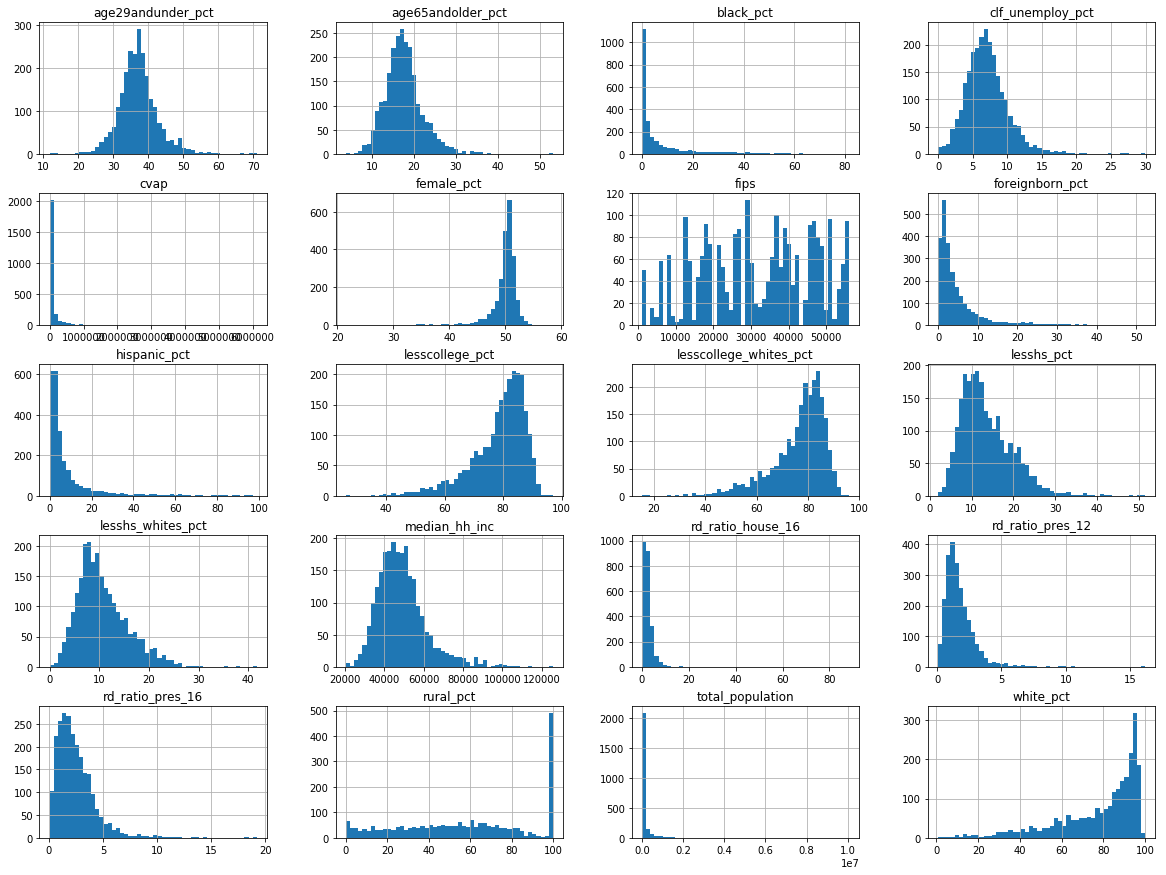

In [13]:
# df1  = df1.drop('fips', axis=1)
df1.hist(bins=50, figsize=(20,15))
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df1, test_size=0.2, random_state=42)

print('Training set:', len(train_set))
print('Testing set:', len(test_set))

Training set: 1910
Testing set: 478


In [15]:
corr_matrix = df1.corr()

In [16]:
corr_matrix['rd_ratio_pres_16'].sort_values(ascending=False)

rd_ratio_pres_16          1.000000
rd_ratio_pres_12          0.875234
rd_ratio_house_16         0.496116
lesscollege_whites_pct    0.430941
rural_pct                 0.430188
white_pct                 0.398971
lesscollege_pct           0.360033
lesshs_whites_pct         0.285091
age65andolder_pct         0.195759
fips                      0.113078
lesshs_pct                0.066080
female_pct               -0.134954
age29andunder_pct        -0.140205
median_hh_inc            -0.151262
hispanic_pct             -0.178859
clf_unemploy_pct         -0.232075
total_population         -0.240155
cvap                     -0.254348
black_pct                -0.309915
foreignborn_pct          -0.313742
Name: rd_ratio_pres_16, dtype: float64

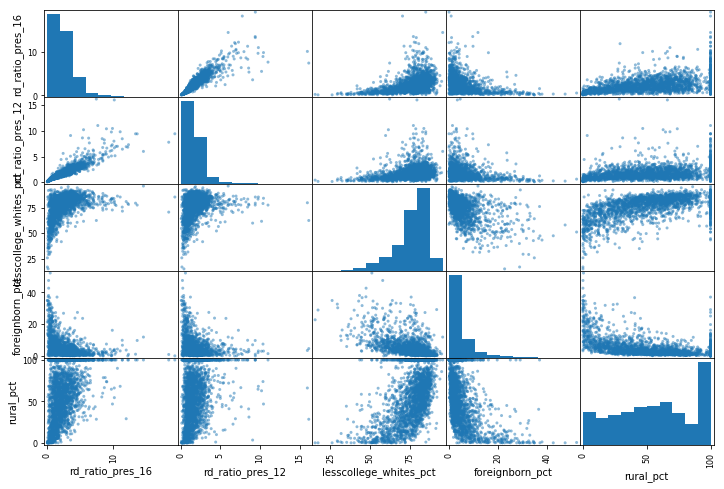

In [17]:
from pandas.plotting import scatter_matrix

attributes = ['rd_ratio_pres_16', 'rd_ratio_pres_12', 'lesscollege_whites_pct', 
              'foreignborn_pct', 'rural_pct']

scatter_matrix(df1[attributes], figsize=(12,8))
plt.show()

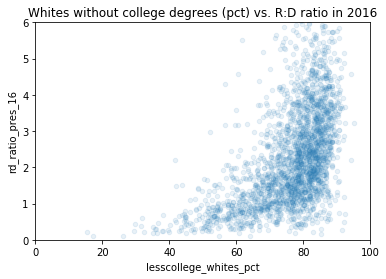

In [18]:
df1.plot(kind='scatter', x='lesscollege_whites_pct', 
         y='rd_ratio_pres_16', alpha=0.1)

plt.axis([0, 100, 0, 6])
plt.title("Whites without college degrees (pct) vs. R:D ratio in 2016")
plt.show()

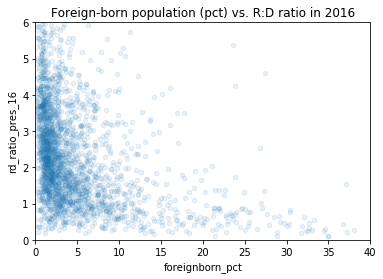

In [19]:
df1.plot(kind='scatter', x='foreignborn_pct', 
         y='rd_ratio_pres_16', alpha=0.1)

plt.axis([0, 40, 0, 6])
plt.title("Foreign-born population (pct) vs. R:D ratio in 2016")
plt.show()

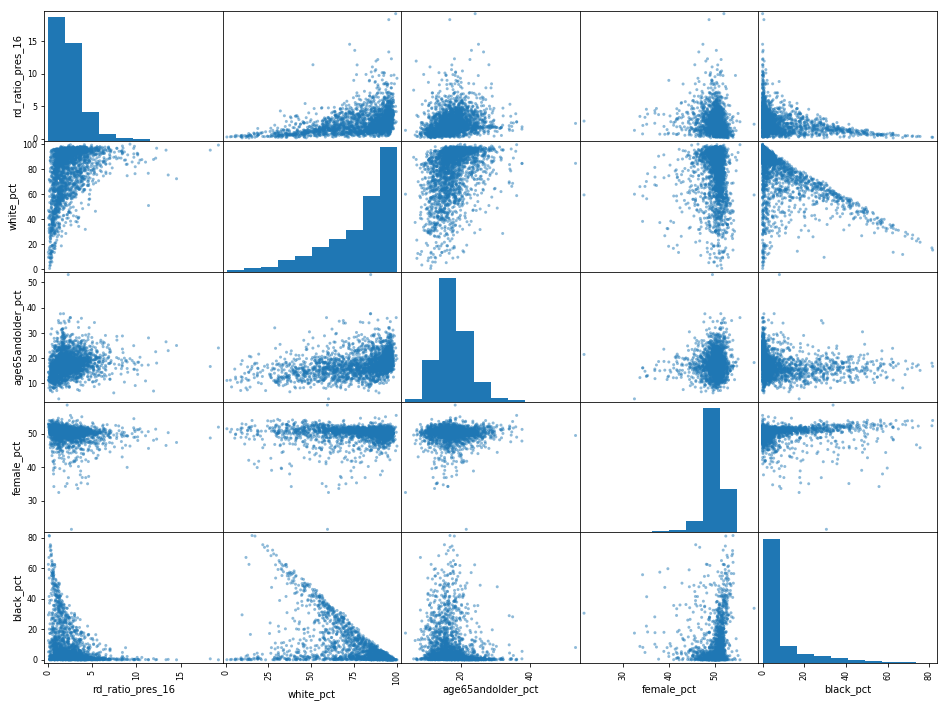

In [20]:
from pandas.plotting import scatter_matrix

attributes = ['rd_ratio_pres_16', 'white_pct', 'age65andolder_pct', 
              'female_pct', 'black_pct']

scatter_matrix(df1[attributes], figsize=(16,12))
plt.show()

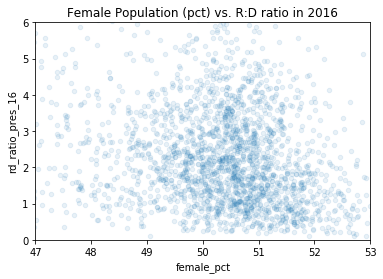

In [21]:
df1.plot(kind='scatter', x='female_pct', 
         y='rd_ratio_pres_16', alpha=0.1)

plt.axis([47, 53, 0, 6])
plt.title("Female Population (pct) vs. R:D ratio in 2016")
plt.show()

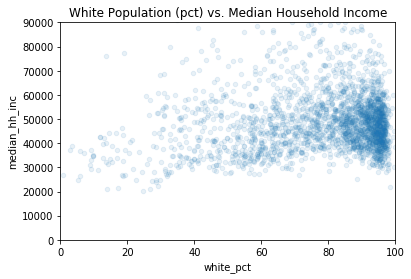

In [22]:
df1.plot(kind='scatter', x='white_pct', 
         y='median_hh_inc', alpha=0.1)

plt.axis([0, 100, 0, 90000])
plt.title("White Population (pct) vs. Median Household Income")
plt.show()

In [23]:
train_features = train_set.drop(['rd_ratio_pres_16', 'fips'], axis=1)
train_labels = train_set['rd_ratio_pres_16'].copy()

In [24]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1910 entries, 1455 to 1248
Data columns (total 18 columns):
total_population          1910 non-null float64
cvap                      1910 non-null float64
white_pct                 1910 non-null float64
black_pct                 1910 non-null float64
hispanic_pct              1910 non-null float64
foreignborn_pct           1910 non-null float64
female_pct                1910 non-null float64
age29andunder_pct         1910 non-null float64
age65andolder_pct         1910 non-null float64
median_hh_inc             1910 non-null float64
clf_unemploy_pct          1910 non-null float64
lesshs_pct                1910 non-null float64
lesscollege_pct           1910 non-null float64
lesshs_whites_pct         1910 non-null float64
lesscollege_whites_pct    1910 non-null float64
rural_pct                 1910 non-null float64
rd_ratio_pres_12          1910 non-null float64
rd_ratio_house_16         1910 non-null float64
dtypes: float64(18)
memory

In [25]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
train_features = std_scaler.fit_transform(train_features)
train_features

array([[-0.30405325, -0.32985148,  0.94688206, ...,  1.35830481,
         0.5430212 ,  0.40030801],
       [-0.17879006, -0.18111134,  0.42716358, ..., -0.21196918,
        -0.1006033 , -0.0139107 ],
       [-0.05643991, -0.05567316,  0.04174183, ..., -0.69412446,
         1.06110419,  0.33946088],
       ...,
       [-0.27722304, -0.29631988,  0.81034537, ..., -0.29777601,
        -0.41809376, -0.39988461],
       [ 0.89589262,  0.99289477, -0.77589225, ..., -1.81037845,
        -0.68965356, -0.1769088 ],
       [-0.30130689, -0.3259478 ,  0.02839243, ..., -0.18279058,
        -0.15377271, -0.20099533]])

In [26]:
train_features.shape

(1910, 18)

In [27]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_features, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# let's try the full preprocessing pipeline on a few training instances
some_data = train_features[:5, :]
some_labels = train_labels[:5]

print("Predictions:", lin_reg.predict(some_data))

Predictions: [3.76072459 1.95614881 4.12122301 2.2133599  0.81332522]


In [29]:
print('Labels:', list(some_labels))

Labels: [3.807763401109057, 2.3134907251264756, 3.642352654651729, 2.114871794871795, 0.7533589050284013]


In [30]:
from sklearn.metrics import mean_squared_error

train_predictions = lin_reg.predict(train_features)
lin_mse = mean_squared_error(train_labels, train_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.6821334916556936

In [31]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(train_labels, train_predictions)
lin_mae

0.3738584817532239

In [32]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='linear')
svm_reg.fit(train_features, train_labels)
train_predictions = svm_reg.predict(train_features)
svm_mae = mean_absolute_error(train_labels, train_predictions)
svm_mae

0.34984124429373975

In [33]:
svm_reg_rbf = SVR(kernel='rbf')
svm_reg_rbf.fit(train_features, train_labels)
train_predictions = svm_reg_rbf.predict(train_features)
svm_rbf_mae = mean_absolute_error(train_labels, train_predictions)
svm_rbf_mae

0.224293797844679

In [34]:
print("Predictions:", svm_reg_rbf.predict(some_data))

Predictions: [4.12158174 2.14443005 3.70094063 2.03161371 0.86274723]


In [35]:
print('Labels:', list(some_labels))

Labels: [3.807763401109057, 2.3134907251264756, 3.642352654651729, 2.114871794871795, 0.7533589050284013]


In [36]:
X_test = test_set.drop(["rd_ratio_pres_16", 'fips'], axis=1)
y_test = test_set["rd_ratio_pres_16"].copy()

X_test_prepared = std_scaler.fit_transform(X_test)
final_predictions = svm_reg_rbf.predict(X_test_prepared)

final_mae = mean_absolute_error(y_test, final_predictions)
final_mae

0.29881717098157773

In [37]:
df2_og.head()

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,"Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2013-17","High school diploma only, 2013-17","Some college or associate's degree, 2013-17","Bachelor's degree or higher, 2013-17","Percent of adults with less than a high school diploma, 2013-17","Percent of adults with a high school diploma only, 2013-17","Percent of adults completing some college or associate's degree, 2013-17","Percent of adults with a bachelor's degree or higher, 2013-17"
0,0,US,United States,NaN,NaN,NaN,NaN,52373312.0,34158051.0,11650730.0,...,27.4,24.4,27437114.0,59093612.0,62853315.0,66887603.0,12.7,27.3,29.1,30.9
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,1062306.0,468269.0,136287.0,...,25.9,19.0,481059.0,1012551.0,979449.0,803578.0,14.7,30.9,29.9,24.5
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,6611.0,3757.0,933.0,...,26.9,18.0,4521.0,12363.0,10697.0,9176.0,12.3,33.6,29.1,25.0
3,1003,AL,Baldwin County,4.0,5.0,3.0,2.0,18726.0,8426.0,2334.0,...,29.3,23.1,13997.0,39771.0,45286.0,43968.0,9.8,27.8,31.7,30.7
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,8120.0,2242.0,581.0,...,21.3,10.9,4960.0,6549.0,4707.0,2218.0,26.9,35.5,25.5,12.0


In [38]:
# df1 = df1_og.copy()

In [39]:
df2 = df2_og.drop('FIPS Code', axis=1)
df2['fips'] = df2_og['FIPS Code']

In [40]:
df3 = df3_og.drop('FIPS', axis=1)
df3['fips'] = df3_og['FIPS']

In [41]:
df4 = df4_og.drop('FIPS', axis=1)
df4['fips'] = df4_og['FIPS']

In [42]:
df_merge_1 = pd.merge(df1, df2, on='fips')
df_merge_2 = pd.merge(df3, df4, on='fips')
df_merge = pd.merge(df_merge_1, df_merge_2, on='fips')
df_merge = df_merge.reset_index(drop=True)

In [43]:
df_merge.head()

,fips,total_population,cvap,white_pct,black_pct,hispanic_pct,foreignborn_pct,female_pct,age29andunder_pct,age65andolder_pct,...,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
0,1001,55049.0,40690.0,75.683482,18.370906,2.572254,1.838362,51.176225,40.037058,13.978456,...,25972.0,24958.0,1014.0,3.9,25957.0,25015.0,942.0,3.6,58343.0,121.1
1,1005,26614.0,20375.0,45.885624,47.888329,4.309762,2.859397,46.498084,37.664387,16.528895,...,8317.0,7831.0,486.0,5.8,8373.0,7940.0,433.0,5.2,32490.0,67.4
2,1007,22572.0,17590.0,74.765196,21.212121,2.223994,1.351232,46.464646,37.329435,14.885699,...,8550.0,8174.0,376.0,4.4,8661.0,8317.0,344.0,4.0,45795.0,95.0
3,1009,57704.0,42430.0,87.657701,1.557951,8.727298,4.271801,50.485235,37.240053,17.192916,...,24725.0,23726.0,999.0,4.0,25006.0,24128.0,878.0,3.5,48253.0,100.1
4,1011,10552.0,8195.0,21.683093,75.502274,0.123199,1.516300,45.801744,37.935936,15.134572,...,4833.0,4595.0,238.0,4.9,4776.0,4552.0,224.0,4.7,29113.0,60.4


In [44]:
df_merge.describe()

,fips,total_population,cvap,white_pct,black_pct,hispanic_pct,foreignborn_pct,female_pct,age29andunder_pct,age65andolder_pct,...,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
count,2388.000000,2.388000e+03,2.388000e+03,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,2388.000000,...,2.388000e+03,2.388000e+03,2388.000000,2388.000000,2.388000e+03,2.388000e+03,2388.000000,2388.000000,2388.000000,2388.000000
mean,31869.163735,1.219748e+05,8.573907e+04,78.001579,7.917202,8.848111,4.734413,49.949936,37.107724,17.625190,...,6.169477e+04,5.901864e+04,2676.123116,4.561935,6.223845e+04,5.982354e+04,2414.910385,4.089866,52359.027638,90.489238
std,14870.130053,3.686295e+05,2.376275e+05,19.712108,12.995884,13.859671,5.757862,2.264877,5.487076,4.470887,...,1.892536e+05,1.808228e+05,8579.794944,1.524063,1.912231e+05,1.834760e+05,7903.279397,1.364585,13855.429578,20.687040
min,1001.000000,7.600000e+01,6.000000e+01,0.760221,0.000000,0.000000,0.000000,21.513413,11.842105,3.854570,...,1.000000e+02,9.500000e+01,5.000000,1.500000,1.020000e+02,9.800000e+01,4.000000,1.300000,22679.000000,39.900000
25%,19066.000000,1.312650e+04,1.004500e+04,67.385003,0.560930,1.919966,1.379590,49.484268,33.875559,14.854313,...,5.760500e+03,5.522750e+03,268.750000,3.500000,5.752000e+03,5.521750e+03,237.000000,3.100000,43313.000000,76.900000
50%,33012.000000,3.132450e+04,2.369250e+04,85.513159,1.921139,3.776596,2.719240,50.407542,36.913997,17.251913,...,1.454700e+04,1.385350e+04,650.500000,4.400000,1.464850e+04,1.404750e+04,588.500000,3.900000,50247.000000,87.450000
75%,46027.500000,8.370025e+04,6.303250e+04,93.363017,8.815863,8.853020,5.694926,51.064013,39.796684,19.829690,...,4.043975e+04,3.880450e+04,1813.750000,5.300000,4.073950e+04,3.924050e+04,1621.250000,4.800000,58375.000000,100.600000
max,56045.000000,1.005716e+07,6.123490e+06,100.000000,81.533225,98.958862,52.229868,58.499127,70.981316,53.106375,...,5.096516e+06,4.853818e+06,242698.000000,19.500000,5.136341e+06,4.896512e+06,239829.000000,18.100000,136191.000000,251.400000


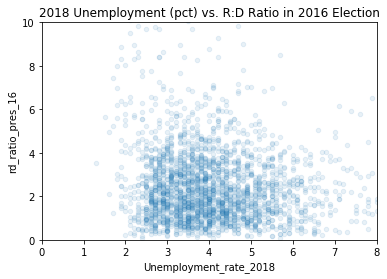

In [45]:
df_merge.plot(kind='scatter', x='Unemployment_rate_2018', 
         y='rd_ratio_pres_16', alpha=0.1)

plt.axis([0, 8, 0, 10])
plt.title("2018 Unemployment (pct) vs. R:D Ratio in 2016 Election")
plt.show()

In [46]:
for feature in df_merge.columns:
    print(feature)

fips
total_population
cvap
white_pct
black_pct
hispanic_pct
foreignborn_pct
female_pct
age29andunder_pct
age65andolder_pct
median_hh_inc
clf_unemploy_pct
lesshs_pct
lesscollege_pct
lesshs_whites_pct
lesscollege_whites_pct
rural_pct
rd_ratio_pres_16
rd_ratio_pres_12
rd_ratio_house_16
State
Area name
2003 Rural-urban Continuum Code
2003 Urban Influence Code
2013 Rural-urban Continuum Code
2013 Urban Influence Code
Less than a high school diploma, 1970
High school diploma only, 1970
Some college (1-3 years), 1970
Four years of college or higher, 1970
Percent of adults with less than a high school diploma, 1970
Percent of adults with a high school diploma only, 1970
Percent of adults completing some college (1-3 years), 1970
Percent of adults completing four years of college or higher, 1970
Less than a high school diploma, 1980
High school diploma only, 1980
Some college (1-3 years), 1980
Four years of college or higher, 1980
Percent of adults with less than a high school diploma, 1980
Per

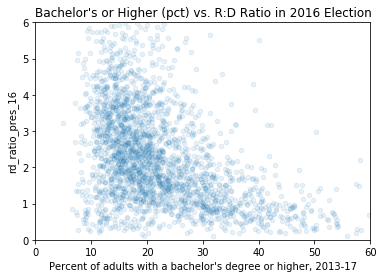

In [47]:
df_merge.plot(kind='scatter', x="Percent of adults with a bachelor's degree or higher, 2013-17", 
         y='rd_ratio_pres_16', alpha=0.1)

plt.axis([0, 60, 0, 6])
plt.title("Bachelor's or Higher (pct) vs. R:D Ratio in 2016 Election")
plt.show()

In [48]:
df5_og= pd.read_excel('religion.XLSX')

In [49]:
df5 = df5_og[['TOTRATE', 'EVANRATE']]
df5['fips'] = df5_og['FIPS']

C:\Users\Toby-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [50]:
df_merge = pd.merge(df_merge, df5, on='fips')

In [51]:
df_merge.head()

,fips,total_population,cvap,white_pct,black_pct,hispanic_pct,foreignborn_pct,female_pct,age29andunder_pct,age65andolder_pct,...,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017,TOTRATE,EVANRATE
0,1001,55049.0,40690.0,75.683482,18.370906,2.572254,1.838362,51.176225,40.037058,13.978456,...,1014.0,3.9,25957.0,25015.0,942.0,3.6,58343.0,121.1,676.878889,503.990000
1,1005,26614.0,20375.0,45.885624,47.888329,4.309762,2.859397,46.498084,37.664387,16.528895,...,486.0,5.8,8373.0,7940.0,433.0,5.2,32490.0,67.4,549.990000,320.250000
2,1007,22572.0,17590.0,74.765196,21.212121,2.223994,1.351232,46.464646,37.329435,14.885699,...,376.0,4.4,8661.0,8317.0,344.0,4.0,45795.0,95.0,498.800000,443.328889
3,1009,57704.0,42430.0,87.657701,1.557951,8.727298,4.271801,50.485235,37.240053,17.192916,...,999.0,4.0,25006.0,24128.0,878.0,3.5,48253.0,100.1,651.620000,509.800000
4,1011,10552.0,8195.0,21.683093,75.502274,0.123199,1.516300,45.801744,37.935936,15.134572,...,238.0,4.9,4776.0,4552.0,224.0,4.7,29113.0,60.4,577.240000,197.180000


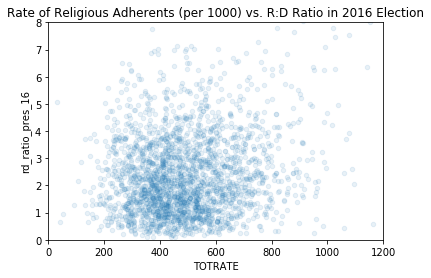

In [52]:
df_merge.plot(kind='scatter', x="TOTRATE", 
         y='rd_ratio_pres_16', alpha=0.1)

plt.axis([0, 1200, 0, 8])
plt.title("Rate of Religious Adherents (per 1000) vs. R:D Ratio in 2016 Election")
plt.show()

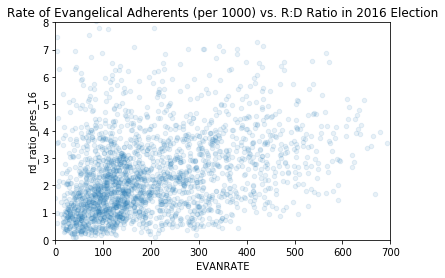

In [53]:
df_merge.plot(kind='scatter', x="EVANRATE", 
         y='rd_ratio_pres_16', alpha=0.1)

plt.axis([0, 700, 0, 8])
plt.title("Rate of Evangelical Adherents (per 1000) vs. R:D Ratio in 2016 Election")
plt.show()

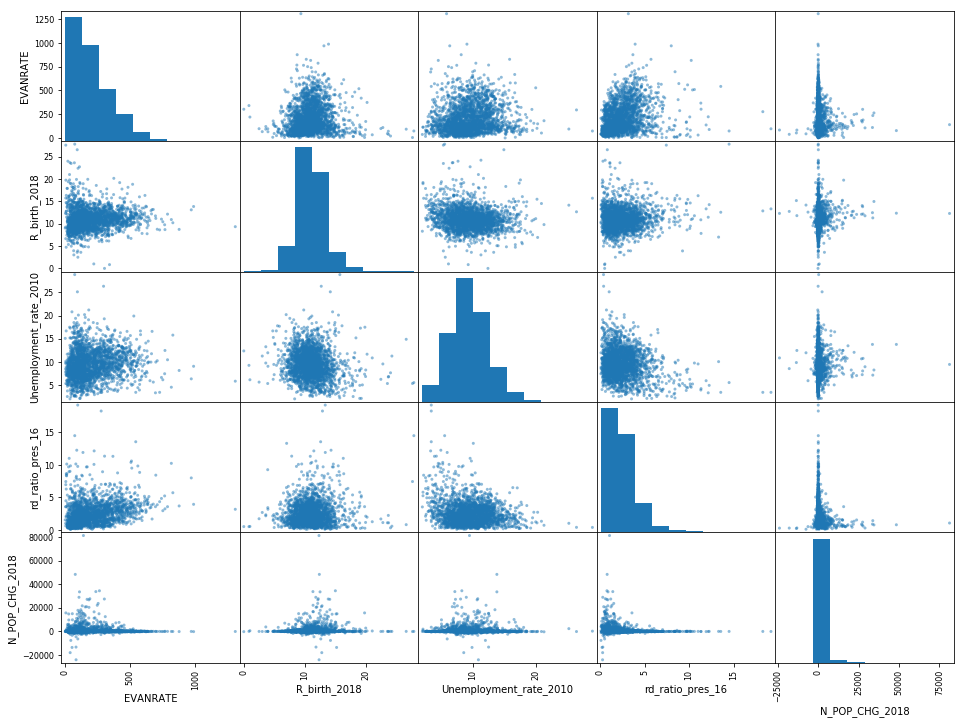

In [54]:
attributes = ['EVANRATE', 'R_birth_2018', 'Unemployment_rate_2010', 
              'rd_ratio_pres_16', 'N_POP_CHG_2018']

scatter_matrix(df_merge[attributes], figsize=(16,12))
plt.show()

In [55]:
corr_matrix = df_merge.corr()
corr_matrix['rd_ratio_pres_16'].sort_values(ascending=False)

rd_ratio_pres_16                                                      1.000000
rd_ratio_pres_12                                                      0.875234
rd_ratio_house_16                                                     0.496116
lesscollege_whites_pct                                                0.430941
rural_pct                                                             0.430188
white_pct                                                             0.398971
Percent of adults with a high school diploma only, 2013-17            0.367725
2003 Rural-urban Continuum Code                                       0.363696
Rural-urban_Continuum Code_2003                                       0.363696
Rural-urban_Continuum Code_2013                                       0.361627
2013 Rural-urban Continuum Code                                       0.361627
Rural_urban_continuum_code_2013                                       0.361627
lesscollege_pct                                     

In [56]:
df_merge['pop_loss_per_capita'] = (df_merge['POP_ESTIMATE_2010'] - df_merge['POP_ESTIMATE_2018']) / df_merge['POP_ESTIMATE_2018']

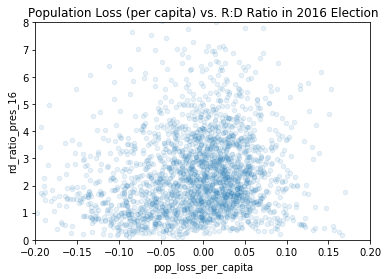

In [57]:
df_merge.plot(kind='scatter', x="pop_loss_per_capita", 
         y='rd_ratio_pres_16', alpha=0.1)

plt.axis([-0.2, 0.2, 0, 8])
plt.title("Population Loss (per capita) vs. R:D Ratio in 2016 Election")
plt.show()

In [58]:
df6 = pd.read_csv('census.csv')
df6['fips'] = df6['fips'].astype(int)
df6 = df6.drop('name', axis=1)
df6= df6.infer_objects()
df6 = df6.dropna()

In [59]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3149 entries, 0 to 3176
Data columns (total 5 columns):
pop1960    3149 non-null float64
pop1970    3149 non-null float64
pop1980    3149 non-null float64
pop1990    3149 non-null float64
fips       3149 non-null int32
dtypes: float64(4), int32(1)
memory usage: 135.3 KB


In [60]:
df_merge = pd.merge(df_merge, df6, on='fips')

In [61]:
df_merge.head()

,fips,total_population,cvap,white_pct,black_pct,hispanic_pct,foreignborn_pct,female_pct,age29andunder_pct,age65andolder_pct,...,Unemployment_rate_2018,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017,TOTRATE,EVANRATE,pop_loss_per_capita,pop1960,pop1970,pop1980,pop1990
0,1001,55049.0,40690.0,75.683482,18.370906,2.572254,1.838362,51.176225,40.037058,13.978456,...,3.6,58343.0,121.1,676.878889,503.990000,-0.015234,18739.0,24460.0,32259.0,34222.0
1,1005,26614.0,20375.0,45.885624,47.888329,4.309762,2.859397,46.498084,37.664387,16.528895,...,5.2,32490.0,67.4,549.990000,320.250000,0.098429,24700.0,22543.0,24756.0,25417.0
2,1007,22572.0,17590.0,74.765196,21.212121,2.223994,1.351232,46.464646,37.329435,14.885699,...,4.0,45795.0,95.0,498.800000,443.328889,0.021071,14357.0,13812.0,15723.0,16576.0
3,1009,57704.0,42430.0,87.657701,1.557951,8.727298,4.271801,50.485235,37.240053,17.192916,...,3.5,48253.0,100.1,651.620000,509.800000,-0.008074,25449.0,26853.0,36459.0,39248.0
4,1011,10552.0,8195.0,21.683093,75.502274,0.123199,1.516300,45.801744,37.935936,15.134572,...,4.7,29113.0,60.4,577.240000,197.180000,0.072993,13462.0,11824.0,10596.0,11042.0


In [62]:
df6.columns

Index(['pop1960', 'pop1970', 'pop1980', 'pop1990', 'fips'], dtype='object')

In [63]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3149 entries, 0 to 3176
Data columns (total 5 columns):
pop1960    3149 non-null float64
pop1970    3149 non-null float64
pop1980    3149 non-null float64
pop1990    3149 non-null float64
fips       3149 non-null int32
dtypes: float64(4), int32(1)
memory usage: 135.3 KB


In [66]:
df_merge['pop_loss_1960'] = (df_merge['pop1960'] - df_merge['POP_ESTIMATE_2018']) / df_merge['pop1960'].astype(int)
df_merge['pop_loss_1970'] = (df_merge['pop1970'] - df_merge['POP_ESTIMATE_2018']) / df_merge['pop1970'].astype(int)
df_merge['pop_loss_1980'] = (df_merge['pop1980'] - df_merge['POP_ESTIMATE_2018']) / df_merge['pop1980'].astype(int)
df_merge['pop_loss_1990'] = (df_merge['pop1990'] - df_merge['POP_ESTIMATE_2018']) / df_merge['pop1990'].astype(int)

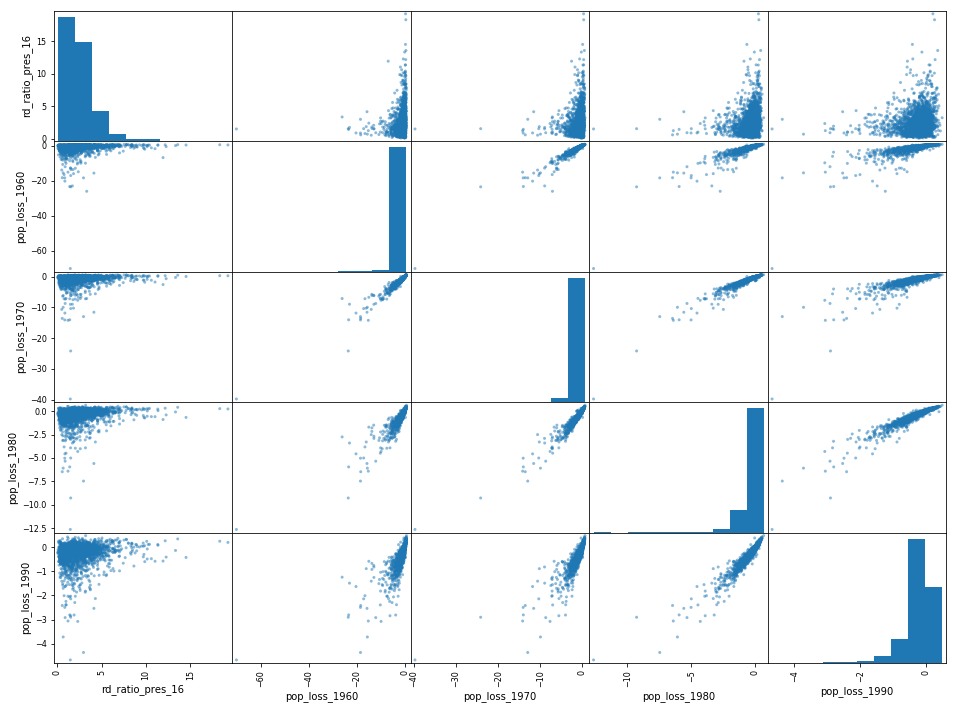

In [67]:
attributes = ['rd_ratio_pres_16', 'pop_loss_1960', 'pop_loss_1970', 
              'pop_loss_1980', 'pop_loss_1990']

scatter_matrix(df_merge[attributes], figsize=(16,12))
plt.show()

In [70]:
attribs = ['rd_ratio_pres_16', 'pop_loss_1960', 'pop_loss_1970', 'pop_loss_1980', 'pop_loss_1990']
corr_mat = df_merge[attribs].corr()

In [71]:
corr_mat['rd_ratio_pres_16'].sort_values(ascending=False)

rd_ratio_pres_16    1.000000
pop_loss_1980       0.139475
pop_loss_1990       0.123200
pop_loss_1960       0.118157
pop_loss_1970       0.105217
Name: rd_ratio_pres_16, dtype: float64

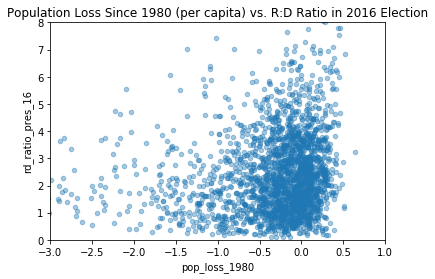

In [76]:
df_merge.plot(kind='scatter', x="pop_loss_1980", 
         y='rd_ratio_pres_16', alpha=0.4)

plt.axis([-3, 1, 0, 8])
plt.title("Population Loss Since 1980 (per capita) vs. R:D Ratio in 2016 Election")
plt.show()